# 作业3&4
> 本次实验报告由jupyter notebook直接导出，某些表格显示不完全，查看完整格式请访问[github仓库](https://github.com/DuoLife-QNL/Python_data_pre/blob/master/haze_3%264.ipynb)

### 导入依赖

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### 导入数据

In [70]:
df = pd.read_csv('BeijingPM20100101_20151231.csv')
df

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0


## 作业3

### 线性插值

In [50]:
df_fill = df.copy()
fill_col = ['HUMI', 'PRES', 'TEMP']
df_fill.loc[:, fill_col] = df[fill_col].interpolate()
df_fill

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0


查看HUMI列中比平均值小超过两倍标准差的数值

In [51]:
col = 'HUMI'
std = np.std(df_fill[col])
mean = np.mean(df_fill[col])
df_fill[(df_fill[col] - mean) < -2*std]

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
35871,35872,2014,2,3,15,4,6.0,4.0,8.0,6.0,-39.0,2.0,1025.0,2.0,NW,96.13,0.0,0.0
35872,35873,2014,2,3,16,4,4.0,4.0,7.0,6.0,-40.0,2.0,1025.0,2.0,NW,104.18,0.0,0.0
37285,37286,2014,4,3,13,1,7.0,11.0,10.0,12.0,-27.0,2.0,1023.0,20.0,NW,58.11,0.0,0.0
37286,37287,2014,4,3,14,1,9.0,19.0,8.0,14.0,-28.0,2.0,1022.0,19.0,NE,5.81,0.0,0.0
37287,37288,2014,4,3,15,1,6.0,10.0,9.0,9.0,-28.0,2.0,1022.0,18.0,NE,12.96,0.0,0.0
37288,37289,2014,4,3,16,1,12.0,11.0,9.0,7.0,-29.0,2.0,1021.0,17.0,NE,20.11,0.0,0.0
37289,37290,2014,4,3,17,1,11.0,11.0,9.0,7.0,-29.0,2.0,1021.0,17.0,NE,24.13,0.0,0.0
37290,37291,2014,4,3,18,1,16.0,13.0,12.0,19.0,-30.0,2.0,1021.0,16.0,NE,28.15,0.0,0.0


查看三列之间相互关系的散点图

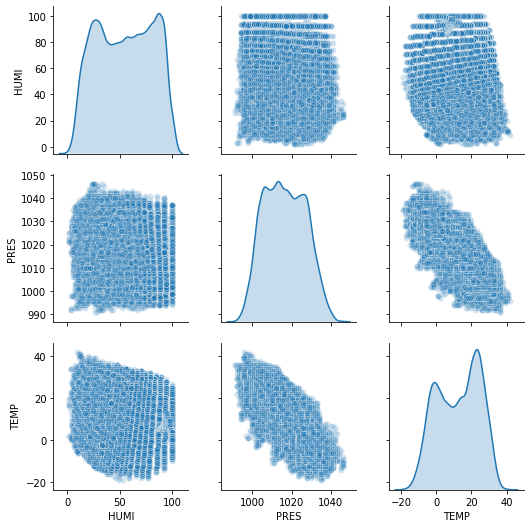

In [48]:
sns.pairplot(df_fill[fill_col], diag_kind = 'kde', plot_kws={'alpha': 0.2})

### 处理异常数据（多于二倍标准差）

In [52]:
for col in fill_col:
    std = np.std(df_fill[col])
    mean = np.mean(df_fill[col])
    for i in df_fill.index:
        if (df_fill.loc[i, col] - mean > 2 * std):
            df_fill.loc[i, col] = mean + 2 * std
        elif(df_fill.loc[i, col] - mean < -2 * std):
            df_fill.loc[i, col] = mean - 2 * std

注意到条数据前后有变化（值已被修正）

In [53]:
df_fill.loc[35871,:]

No                   35872
year                  2014
month                    2
day                      3
hour                    15
season                   4
PM_Dongsi                6
PM_Dongsihuan            4
PM_Nongzhanguan          8
PM_US Post               6
DEWP                   -39
HUMI               2.66098
PRES                  1025
TEMP                     2
cbwd                    NW
Iws                  96.13
precipitation            0
Iprec                    0
Name: 35871, dtype: object

### 将指定三列中超过500的数据修改为500

In [64]:
s_col = df.columns[6:9]
# df_fill[df_fill[s_col[0]] > 500]
for col in s_col:
    for i in df_fill.index:
        if df_fill.loc[i, col] > 500:
            df_fill.loc[i, col] = 500

检验发现之前大于500的数据已经改变

In [63]:
df_fill.loc[27703, s_col]

PM_Dongsi          500
PM_Dongsihuan      NaN
PM_Nongzhanguan    466
Name: 27703, dtype: object

### cbwd 列后项填充
> 修改 cbwd 列中值为“ cv ”的单元格，其值用后项数据填充。

**由于要求中并不是对缺失值的处理，又由于源数据已按时间排好序，故直接使用下一行的数据填充待填充数据**

In [69]:
for i in df_fill.index:
    if df_fill.loc[i, 'cbwd'] == 'cv':
        df_fill.loc[i, 'cbwd'] = df_fill.loc[i + 1, 'cbwd']

## 作业4

### 归一化
> 对 DEWP 和 TEMP 两列 进行 0-1 归一化及 Z Score 归一化处理。结果使用散点图的形式表示。

原始散点图

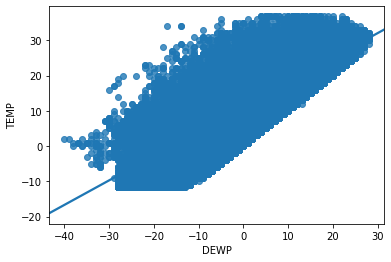

In [75]:
sns.regplot('DEWP', 'TEMP', data = df_fill)

#### 0-1归一化

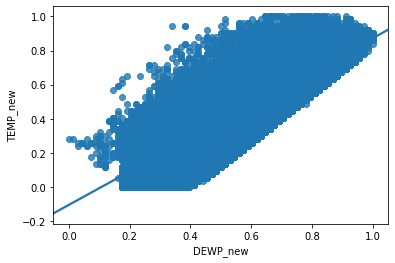

In [76]:
df_fill2 = df_fill.copy()
scaler = MinMaxScaler()
dewp = df_fill['DEWP']
dewp_reshape = dewp.values.reshape(-1, 1)
df_fill2['DEWP_new'] = scaler.fit_transform(dewp_reshape)
temp = df_fill['TEMP']
temp_reshape = temp.values.reshape(-1, 1)
df_fill2['TEMP_new'] = scaler.fit_transform(temp_reshape)
sns.regplot('DEWP_new', 'TEMP_new', data = df_fill2)

#### Z-score 归一化

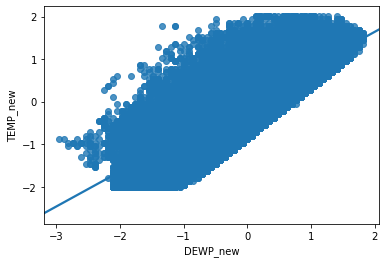

In [78]:
df_fill3 = df_fill.copy()
scaler_std = StandardScaler()
dewp = df_fill['DEWP']
dewp_reshape = dewp.values.reshape(-1, 1)
df_fill3['DEWP_new'] = scaler_std.fit_transform(dewp_reshape)
temp = df_fill['TEMP']
temp_reshape = temp.values.reshape(-1, 1)
df_fill3['TEMP_new'] = scaler_std.fit_transform(temp_reshape)
sns.regplot('DEWP_new', 'TEMP_new', data = df_fill3)

### 离散化
> 将北京的空气质量数据进行离散化，按照空气质量指数分级标准，计算出每个级别对应的天数各有多少

查找资料知PM2.5分级标准如下：

[img](http://www.pm25.com/data/attached/image/20150204/20150204202413_18678.gif)

使用上次作业的代码计算PM2.5指数平均值，拿到处理之后的数据

In [102]:
s_col = df.columns[1:4].append(df.columns[6:10])
org_data = df.loc[:, s_col].copy()    #选取需要的列
org_data
# 清除指定的列全为空的行，dropna参数中axis = 0表示删除行，how = 'all' 表示全为空才删，subset表示针对那几列判空，inplace为真表示是否在原数据上操作，此处要复制到新的dataframe中去，故设为假
cln_data = org_data.dropna(axis = 0, how = 'all', subset = ['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']).copy()
cln_data.loc[:, 'PM_AVG'] = np.nan
for i in cln_data.index:
    cnt_not_null = 0
    PM_sum = 0
    for j in cln_data.columns[3:7]:
        if not np.isnan(cln_data.loc[i, j]):
            cnt_not_null += 1
            PM_sum += cln_data.loc[i, j]
    cln_data.loc[i, 'PM_AVG'] = PM_sum / cnt_not_null

对于PM值大于500的异常值，修改为500

In [103]:
for i in cln_data.index:
    if cln_data.loc[i, 'PM_AVG'] > 500:
        cln_data.loc[i, 'PM_AVG'] = 500

按天分组，之后再进行离散化处理

In [106]:
group_col = ['year', 'month', 'day']
group_col
grouped = cln_data['PM_AVG'].groupby([cln_data['year'], cln_data['month'], cln_data['day']]).mean()
data = pd.DataFrame(grouped)
bins = [0, 50, 100, 150, 200, 300, 500]
group_names = ["优", "良", "轻度污染", "中度污染", "重度污染", "严重污染"]
cats = pd.cut(data.PM_AVG, bins, labels = group_names)

In [107]:
pd.value_counts(cats)

优       699
良       655
轻度污染    402
中度污染    195
重度污染    153
严重污染     51
Name: PM_AVG, dtype: int64